# Analyzing in game relationships between TFT ranks

## Video Link
https://drive.google.com/file/d/1jk8FqTIehS7hzOclS_5U58tgrrv6Wv-A/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

TeamFight Tactics (TFT) is a competitive game where certain choices and strategies determine one's path to victory. With this in mind, we want to determine what kind of strategies differentiate advanced rank play vs lower rank play. For our project, we specifically want to determine if team costs lower, games shorten and optimal compositions change as the rank of the TFT player increases. We conducted our analysis using histograms, Kernel Density estimation, count plots, linear regression and lastly a t-test to verify if our findings were significant. Upon analysis, we concluded that the rank of a TFT player does have an significant impact on how they play and there are distinct patterns that players of a certain rank follow.

# Names

- Jaden Padua
- Daphne Nong
- Tony Guan
- Catherine Lee
- Jennifer Pham

<a id='research_question'></a>
# Research Question

Does the rank of a TFT player have an impact on how the game is played?

<a id='background'></a>

## Background & Prior Work

#### **Introduction**

Teamfight Tactics (TFT) is an auto-chess battler video game created by the company Riot Games, Inc. TFT is a round based strategy game consisting of up to 8 players. In TFT, each player must assemble a team of champions and battle against other player's teams in effort to be the last team standing on the board and claim first place. After each round, players can purchase and arrange their units on a hexagonal chess board. When the round starts, the units attack autonomously, and thus a battle is simulated between the team composition of your team vs the current player you are battling. A player loses the round if all of their units on the board die in battle. Each round that a player loses will decrement their overall health. A player loses the game if their overall health drops below 0. The game ends when there is one last player standing out of the original 8. 

See reference (1) for further details regarding what TFT is.

#### **Ranking System**

In order to understand our research question we need to define the TFT ranked tiers. TFT Has 9 different ranked tiers that players are placed in:
* Iron
* Bronze
* Silver
* Gold
* Platinum
* Diamond
* Master
* Grandmaster
* Challenger

Players are placed in one of these 9 tiers above based on their skill level and in game performance. Player's are allowed to promote or demote to different tiers if they improve or get worse. The Iron tier, for example are for beginner players with little experience whereas the Challenger tier is for professional TFT players who play the game as a full-time job / occupation.

See reference (3) for further details regarding the ranking system.


#### **Unit Cost & Star Levels**

Recall that since units are able to be purchased, every unit has an associated cost attached to them. And since TFT is inherently a card battler game, the cost of each unit can vary based on the quality of the champion. Thus, higher quality units tend to cost more where as lower quality units tend to cost less. A given unit can also become upgraded with the concept of star levels. Each unit on their own has a default star level of 1. If 3 identical units are purchased by a player, the unit can upgrade to star level 2. If 9 identical units are purchased by a player, the unit can upgrade to star level 3.

#### **Team Compositions & Potential Strategies**

Now we define a team composition as a collection of units such that each unit has been purchased by a player. From the above section we know that different team compositions can have different associated costs. And thus, here are some potential strategies that player's use with respect to team comps:
* *buy as many cheap units as possible to try and wipe everyone out early on for a quick win*
* *save their money on expensive, high quality units in effort to outscale and secure a late win*

Hence, it is evident that the cost of a team composition is paramount to the overall success of a player winning. The concept of optimizing your gold / resources for maximal efficiency is called managing your "Economy" or "Econ".

We define an "efficient team composition" as a set of units in a winning entry such that the summation of each of the units respective cost is low, namely:

iterating through each unit in a set of units --> finding their associated cost & star level --> summing this value for every unit --> total_cost (lower number == efficient, higher number == not_efficient).

We proceed to measure how "efficient" the team comps are between professional vs amateur players by analyzing the mean of both elos "total_cost" column and determining which mean is lower.

See reference (2) for more details about team compositions / economy management.

#### **Matchmaking Rating**

Since TFT is played at a competitive level, we have the concept of Matchmaking rating or "MMR" where player's gain ladder points or "LP" in effort to climb the ranks and be placed on the leaderboard for top TFT players in the world. If a player ends up in the top four player's remaining for any given game, they will gain ladder points and increase their overall MMR. However, if they place in the bottom four, a player will lose LP and decrease their MMR. MMR is used to indicate a player's overall skill level and who they are matched up with in future games.

#### **Amateur vs Professional Play**

A professional TFT player can be characterized as a player with an significantly large number of LP and abnormally high MMR. These players are the best of the best, dedicating countless hours to research optimal team compositions and tuning their strategies to the current meta or popularity. Professionals will also extensivelly research their competition by looking up what team compositions their opponents used in the past in effort to counter them. 

See reference (4) for more details about pro vs. amateur players.


#### **References:**

- 1) https://www.hotspawn.com/autobattler/guides/what-is-teamfight-tactics-tft
- 2) https://mobalytics.gg/blog/how-to-manage-your-economy-in-teamfight-tactics-three-strategies/
- 3) https://esports.gg/guides/mobile/tft-rank-system-explained/
- 4) https://www.redbull.com/au-en/cloud9-teamfight-tactics-pro-player-tips-interview



# Hypothesis


We hypothesize that as the rank of a TFT player increases, the team costs get lower, the games get shorter, and the compositions get more efficient. Based on the cited references above (2) and (4) along with our own intuition from personally playing the game, we believe that professional TFT players are said to be signficantly more efficient and aggresive with their play style, resulting in fast games with low cost units.

# Dataset(s)

- Dataset Name: TFT Match Data
- Link to the dataset: https://www.kaggle.com/gyejr95/tft-match-data
- Number of observations: 20,000 (10,000 plat, 10,000 challenger)

This data set includes data about low elo / high elo TFT games (namely plat vs challenger players). It shows information about a specific TFT player's in game statistics such as: gameDuration, ranking, combination, champsions used.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

pd.options.mode.chained_assignment = None

"""
@description: load in plat, challenger, and champion match data into dataframes
@params: None
@returns: List<pandas.DataFrame>
"""
def load_data():
    plat_df = pd.read_csv('data/TFT_Plat_Data.csv')
    chal_df = pd.read_csv('data/TFT_Challenger_Data.csv')
    champ_df = pd.read_csv('data/TFT_Champ_Data.csv')
    
    return [plat_df, chal_df, champ_df]

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
NUM_ROWS = 1500
DROPPED_COLUMNS = ["gameId", "level", "gameDuration"]

In [3]:
"""
@description: Filters raw data to only info that we will actually use

Filters applied:
1. We only want rank 1 entries (people who came in first place) 
2. Only want 1500 Rows of rank 1 entries
3. Remove gameId, level, ingameDuration column because these serve no use

@params: data: List<pandas.DataFrame>
@returns: List<pandas.DataFrame>
"""
def filter_data(data):
    plat_df, chal_df, champ_df = data
    
    plat_df, chal_df = plat_df[plat_df.Ranked == 1].reset_index(), chal_df[chal_df.Ranked == 1].reset_index()
    plat_df, chal_df = plat_df.head(NUM_ROWS), chal_df.head(NUM_ROWS)
    plat_df, chal_df = plat_df.drop(columns=DROPPED_COLUMNS), chal_df.drop(columns=DROPPED_COLUMNS)
    
    return [plat_df, chal_df, champ_df]

In [4]:
"""
@description: Cleans filtered data to be used for analysis

Data cleaning steps:
1. rename "ingameDuration" --> "duration"
2. convert duration seconds to minutes (rounded 2 decimal places)
3. Drop all rows with NaN valuyes

@params: List<pandas.DataFrame>
@returns: List<pandas.DataFrame>

"""
def clean_data(data):
    plat_df, chal_df, champ_df = data
    
    plat_df = plat_df.rename(columns={"ingameDuration": "duration", "champion": "champions"})
    chal_df = chal_df.rename(columns={"ingameDuration": "duration", "champion": "champions"})
    
    plat_df["duration"] = round(plat_df["duration"] / 60, 2) 
    chal_df["duration"] = round(chal_df["duration"] / 60, 2)
    
    return [plat_df, chal_df, champ_df]

In [5]:
"""
@description: Star mapping where 1 start maps to 1 unit, 2 stars maps to 3 units, 3 stars maps to 9 units
"""
star_map = {
    1: 1,
    2: 3,
    3: 9
}

In [6]:
"""
@description: Calculates total_cost of each row based on champ / star values in the champ_json
@params: champs_json:Dict(), champ_df:<pandas.DataFrame>
@returns: total_cost:int
"""
def calc_total_cost(champs_json, champ_df):
    total_cost = 0
    for champ in champs_json:
        champ_info = champ_df.loc[champ_df['name'] == champ]
        # disregard row if champ not found, set to negative val which we will remove later
        if champ_info.empty:
            total_cost = 0
            break

        star = champs_json[champ]['star']
        cost = champ_info['cost'].values[0]

        champ_cost = cost * star_map[star]
        total_cost += champ_cost
    return total_cost

In [7]:
"""
@description: Calcs most used synergy per row for a given winning player
@params: synergies_json:Dict(), champ_df:pandas.DataFrame
@returns: most_synergy:str
"""
def calc_most_synergy(synergies_json, champ_df):
    most_synergy = ""
    most_synergy_val = 0
    for key in synergies_json:
        val = synergies_json[key]
        
        if val > most_synergy_val:
            most_synergy_val = val
            most_synergy = key
    return most_synergy

In [8]:
"""
@description: Adds / Calculates total cost of board and most used synergy for each row in our df

Methodology:
1. init total_cost blank value for each row in new_df
3. For each row there is a "champions" column which is all the champs a certain player has
4. For each champ in json object of champions, locate that champ in champ_df
5. Retrieve cost associated by champ and multiply by star level
6. set new_df "total_cost" column to that total_cost

@params: df:pandas.DataFrame, champ_df:pandas.DataFrame
@returns: new_df:pandas.DataFrame

"""
def add_cols(df, champ_df):
    new_df = df
    new_df["total_cost"] = pd.Series(dtype='int')
    new_df["most_synergy"] = pd.Series(dtype='str')

    for i in range(len(df)):
        champs = df.iloc[i]['champions']
        champs_str = str(champs).replace("'", '"').lower()
        champs_json = json.loads(champs_str)

        total_cost = calc_total_cost(champs_json, champ_df)
        new_df.at[i, "total_cost"] = total_cost
        
        synergies = df.iloc[i]['combination']
        synergies_str = str(synergies).replace("'", '"').lower()
        synergies_json = json.loads(synergies_str)
         
        most_synergy = calc_most_synergy(synergies_json, champ_df)
        new_df.at[i, "most_synergy"] = most_synergy
        
    return new_df

In [9]:
"""
@description: loading --> filtering --> cleaning
"""
raw_data = load_data()
filtered_data = filter_data(raw_data)
cleaned_data = clean_data(filtered_data)
"""
@description: adding / calculating total_cost, most_synergy columns
"""
plat_df, chal_df, champ_df = cleaned_data

plat_df, chal_df  = add_cols(plat_df, champ_df), add_cols(chal_df, champ_df)

In [10]:
plat_df

,index,lastRound,Ranked,duration,combination,champions,total_cost,most_synergy
0,4,38,1,32.59,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",57.0,chrono
1,13,37,1,34.57,"{'Blaster': 2, 'Chrono': 2, 'Infiltrator': 2, ...","{'KhaZix': {'items': [99, 17, 17], 'star': 3},...",78.0,valkyrie
2,20,40,1,37.24,"{'DarkStar': 2, 'Demolitionist': 2, 'Infiltrat...","{'KhaZix': {'items': [59], 'star': 2}, 'KaiSa'...",105.0,infiltrator
3,31,37,1,34.05,"{'Blaster': 1, 'Chrono': 7, 'ManaReaver': 1, '...","{'TwistedFate': {'items': [], 'star': 1}, 'Cai...",63.0,chrono
4,32,38,1,34.63,"{'Blaster': 1, 'Chrono': 1, 'Rebel': 6, 'Set3_...","{'Malphite': {'items': [], 'star': 2}, 'Yasuo'...",94.0,rebel
...,...,...,...,...,...,...,...,...
1495,11971,37,1,32.70,"{'Blaster': 1, 'Chrono': 2, 'Cybernetic': 3, '...","{'Fiora': {'items': [6], 'star': 2}, 'Blitzcra...",71.0,cybernetic
1496,11978,35,1,32.30,"{'Chrono': 2, 'DarkStar': 1, 'Rebel': 1, 'Set3...","{'TwistedFate': {'items': [], 'star': 2}, 'Pop...",82.0,set3_sorcerer
1497,11990,37,1,34.93,"{'Chrono': 2, 'Demolitionist': 2, 'Infiltrator...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",80.0,set3_blademaster
1498,11994,41,1,37.00,"{'Chrono': 2, 'Cybernetic': 2, 'Infiltrator': ...","{'TwistedFate': {'items': [], 'star': 3}, 'Mal...",113.0,set3_brawler


In [11]:
chal_df

,index,lastRound,Ranked,duration,combination,champions,total_cost,most_synergy
0,0,35,1,35.57,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona...",98.0,protector
1,8,41,1,39.63,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Malphite': {'items': [], 'star': 2}, 'Yasuo'...",76.0,rebel
2,16,38,1,37.08,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 2}, 'Yasuo': {...",73.0,rebel
3,24,38,1,38.60,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 1}, 'Graves...",87.0,blaster
4,32,37,1,35.67,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':...",108.0,protector
...,...,...,...,...,...,...,...,...
1495,11960,40,1,36.74,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 6, '...","{'Fiora': {'items': [67], 'star': 1}, 'Leona':...",88.0,cybernetic
1496,11968,37,1,32.91,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 1}, 'KaiSa': ...",121.0,infiltrator
1497,11976,37,1,35.03,"{'Blaster': 2, 'Chrono': 4, 'ManaReaver': 2, '...","{'Xayah': {'items': [], 'star': 2}, 'Shen': {'...",74.0,chrono
1498,11984,40,1,37.86,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [68], 'star': 3}, 'Sona...",99.0,protector


In [12]:
plat_df.describe()

,index,lastRound,Ranked,duration,total_cost
count,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,6007.019333,38.413333,1.0,36.055093,96.894667
std,3465.848374,2.262278,0.0,2.346572,22.668704
min,4.000000,33.000000,1.0,29.740000,0.000000
25%,3011.000000,37.000000,1.0,34.290000,82.000000
50%,6005.000000,38.000000,1.0,35.880000,96.000000
75%,9009.000000,40.000000,1.0,37.630000,111.000000
max,12005.000000,47.000000,1.0,44.300000,179.000000


In [13]:
chal_df.describe()

,index,lastRound,Ranked,duration,total_cost
count,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,5996.000000,38.136000,1.0,35.406513,94.417333
std,3465.256123,2.154824,0.0,2.224832,19.520516
min,0.000000,33.000000,1.0,29.370000,42.000000
25%,2998.000000,37.000000,1.0,33.860000,80.000000
50%,5996.000000,38.000000,1.0,35.010000,94.500000
75%,8994.000000,40.000000,1.0,36.740000,108.000000
max,11992.000000,47.000000,1.0,44.220000,168.000000


# Data Analysis & Results

The first step in our exploratory data analysis is to analyze the total team compositon cost columns between both elo's (plat vs. challenger). We first simply analyze both mean and percentage increase values between the two ranks:

In [14]:
plat_cost = plat_df["total_cost"]
chal_cost = chal_df["total_cost"]

plat_mean = round(plat_cost.mean(), 2) 
chal_mean = round(chal_cost.mean(), 2)

In [15]:
"""
@description: Display's Plat / Challenger Means
@params: None
@returns: msg:str
"""
def display_means():
    msg = "Plat Mean: {}, Chal Mean: {}".format(str(plat_mean), str(chal_mean))
    return msg

In [16]:
"""
@description: Display percentage increases
@params: None
@returns: msg:str
"""
def display_perc_increase():
    perc_increase = round(((plat_mean - chal_mean)/plat_mean) * 100, 2)
    msg = "Percentage increase on average: {}%".format(perc_increase)
    return msg

In [17]:
display_means()

'Plat Mean: 96.89, Chal Mean: 94.42'

In [18]:
display_perc_increase()

'Percentage increase on average: 2.55%'

From this simple calculation we see that on average, plat players spend around:

- 2.49 more gold than challenger
- 2.55% more gold than challenger players.

We then plot Histogram / KDE plots to better explore the distribution of the data

In [19]:
"""
@description: plots histograms and kernal density estimations of total cost cols / duration per both dfs
@params: None
@returns: None
"""
def plot_hist_KDEs(col, color1, color2):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

    sns.histplot(ax=axes[0][0], data=plat_df, x=col, color=color1)
    sns.kdeplot(ax=axes[1][0], data=plat_df, x=col, color=color1)
    axes[0][0].set_title("Plat Histogram")
    axes[1][0].set_title("Plat KDE Plot")

    sns.histplot(ax=axes[0][1], data=chal_df, x=col, color=color2)
    sns.kdeplot(ax=axes[1][1], data=chal_df, x=col, color=color2)
    axes[0][1].set_title("Chal Histogram")
    axes[1][1].set_title("Chal KDE Plot")

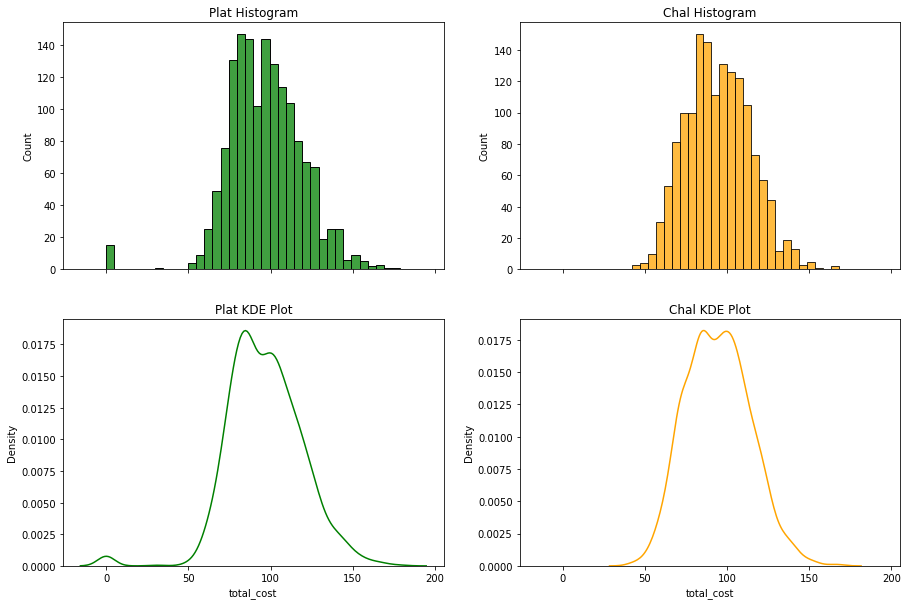

In [20]:
plot_hist_KDEs("total_cost", "green", "orange")

From our distributions / exploratory intuition we see that plat players tend to spend slighty more than challenger players, however we will conduct a formal t-test and observe if such observations are significant:

In [21]:
"""
@description: Using t-test to observe if observations prove a significant difference
@NOTE: using threshold alpha p-value of 0.01 
@params: None
@returns: msg:str
"""
def get_t_test(col_1, col_2):
    threshold = 0.01
    t_val, p_val = ttest_ind(col_1, col_2)
    
    msg = "p-value: {}, ".format(str(p_val))
    
    if p_val < threshold:
        msg += "Significant Difference"
    else:
        msg += "NO Significant Difference"
    return msg

In [22]:
get_t_test(plat_cost, chal_cost)

'p-value: 0.0013540373109294972, Significant Difference'

From our formal t-test it is evident that there IS a signficant difference between plat and challenger team 
composition costs

We now conduct a similiar investigation on the duration of a game between plat / challenger players

In [23]:
plat_duration = plat_df["duration"]
chal_duration = chal_df["duration"]

plat_mean = round(plat_duration.mean(), 2) 
chal_mean = round(chal_duration.mean(), 2)

In [24]:
display_means()

'Plat Mean: 36.06, Chal Mean: 35.41'

In [25]:
display_perc_increase()

'Percentage increase on average: 1.8%'

From this simple calculation we see that on average, plat players have a game duration of around:

- 25 seconds more than challenger players
- 1.8% more time than challenger players

We then plot Histogram / KDE plots to better explore the distribution of the data


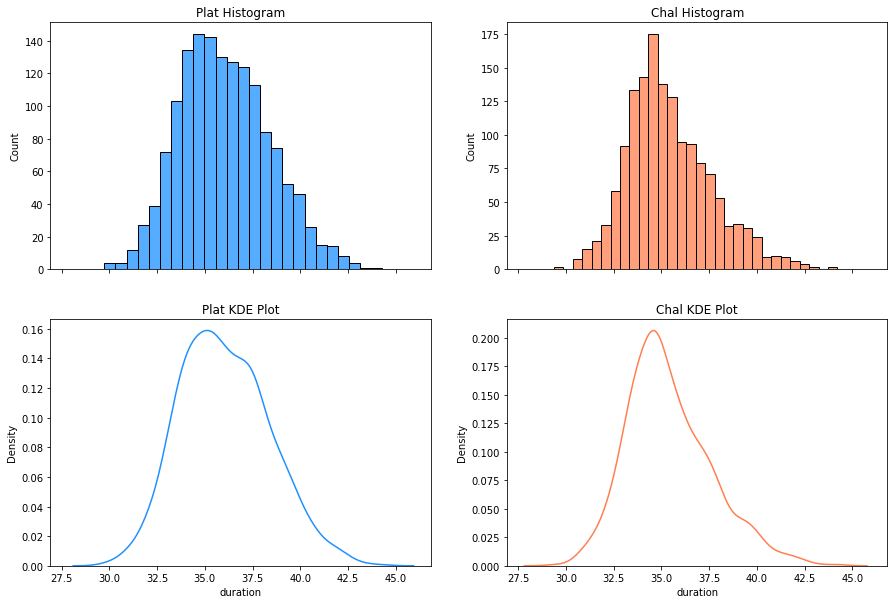

In [26]:
plot_hist_KDEs("duration", "dodgerblue", "coral")

We observe from the KDE and histogram distributions that the results from game duration between plat / challenger 
seem MORE signficant than total cost. However, we again conduct a formalized t-test to challenge our intuition:

In [27]:
get_t_test(plat_duration, chal_duration)

'p-value: 1.084877140651484e-14, Significant Difference'

From our formal t-test it is evident that there also IS a signficant difference between plat and challenger game durations

Next, we want to analyze the relationships of popular team synergies (most used type of unit) between plat and
challenger players. To do this we start by analyzing the value counts of each synergy in our plat / chal columns

In [28]:
plat_synergies = plat_df["most_synergy"].value_counts()
plat_synergies

blaster             242
infiltrator         194
set3_celestial      149
set3_sorcerer       110
chrono              100
cybernetic           99
darkstar             94
set3_brawler         93
set3_blademaster     82
rebel                77
protector            76
vanguard             63
starguardian         42
spacepirate          35
set3_mystic          17
set3_void             5
shadow                4
demolitionist         3
set2_glacial          2
mechpilot             2
poison                2
set2_ranger           2
electric              1
crystal               1
valkyrie              1
set2_assassin         1
manareaver            1
inferno               1
warden                1
Name: most_synergy, dtype: int64

In [29]:
chal_synergies = chal_df["most_synergy"].value_counts()
chal_synergies

cybernetic          322
infiltrator         294
set3_brawler        126
blaster             125
chrono              111
vanguard            103
protector            93
set3_sorcerer        88
starguardian         71
darkstar             66
set3_blademaster     49
rebel                33
set3_celestial       10
set3_mystic           9
Name: most_synergy, dtype: int64

From value counts alone we see that platinum players try a greater number of synergies than challenger
players. We then calculate the exact number by finding the unique value counts number of each rank:


In [30]:
"""
@description: Prints out a msg that displays the number of our unique synergies
@params: None
@returns: None
"""
def display_unique_synergies():
    plat_unique_synergies = len(plat_synergies.unique())
    chal_unique_synergies = len(chal_synergies.unique())
    
    print("Plat Unique Synergies: {}".format(plat_unique_synergies))
    print("Challenger Unique Synergies: {}".format(chal_unique_synergies))

In [31]:
display_unique_synergies()

Plat Unique Synergies: 20
Challenger Unique Synergies: 14


From this calculation we can see that there is a greater variation in the synergies used in platinum, implying that
plat players tend to try more compositions while challenger players tend to stick to the meta and experiment less.

Now let us create count plots of the top 10 most used synergies per each rank:

In [32]:
"""
@description: Plots countplots of most used synergies per rank 
@params: None
@returns: None
"""
def plot_synergies():
    fig, axes = plt.subplots(2, 1, figsize=(15,20))
    sns.countplot(ax=axes[0], data=plat_df, y="most_synergy",
                  order=plat_df["most_synergy"].value_counts().iloc[:10].index)
    
    axes[0].set_title("Plat Synergies")
    sns.countplot(ax=axes[1], data=chal_df, y="most_synergy", 
                  order=chal_df["most_synergy"].value_counts().iloc[:10].index)
    axes[1].set_title("Challenger Synergies")

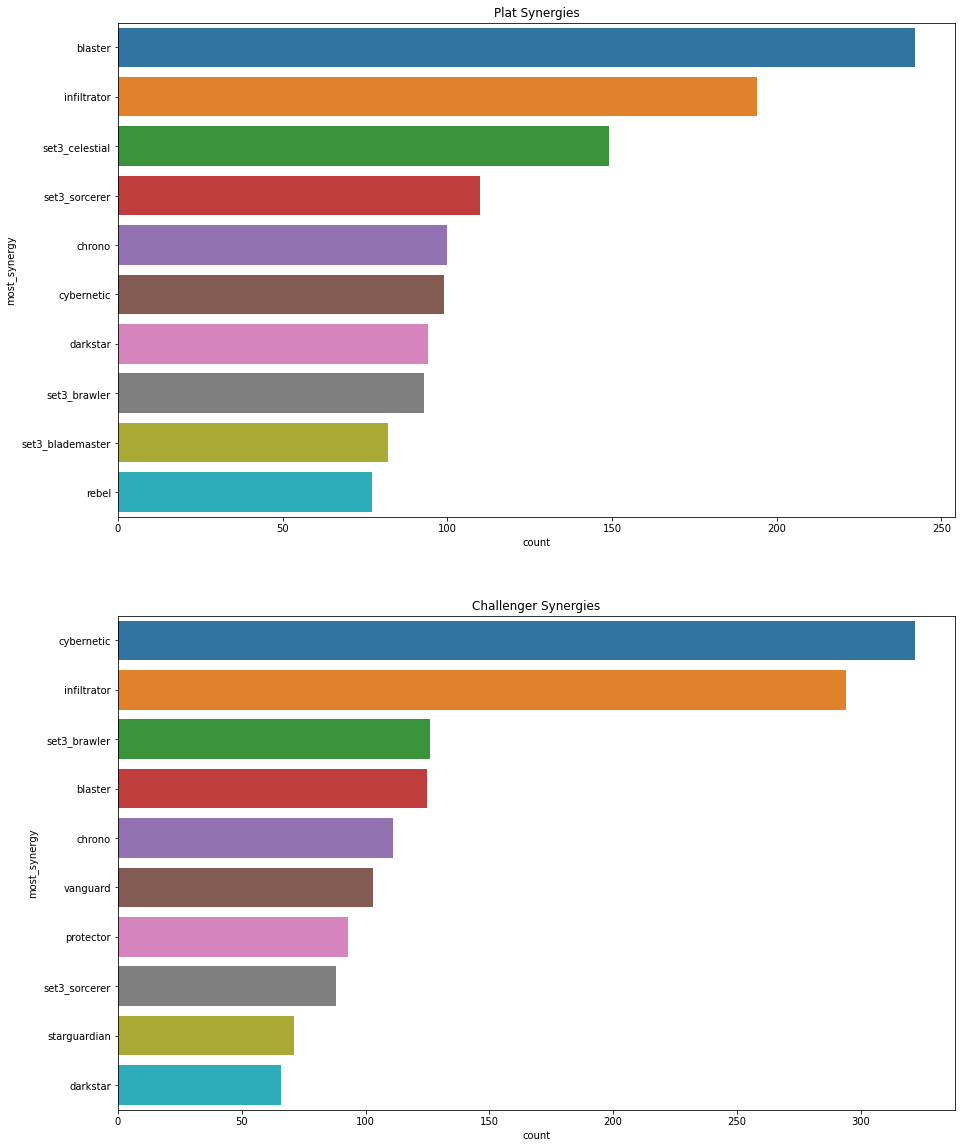

In [33]:
plot_synergies()

From our findings of synergies between plat vs. challenger players it is evident that the synergies used between elos is signficantly different. For example, plat players seem to gravitate towards the "blaster" synergy while challenger players seem to stick with "cybernetic" synergies.

Furthermore we can conclude that not only are synergies used differently in plat vs. challenger games, but the variation of synergies is also different and plat players tend to experiment with different play styles / synergies in their games

Next, we want to dig deeper in the relationships between gameDuration and total composition costs by comparing two linear regressions, namely one for plat players and one for challenger players. Our first step is to validate that gameDuration and total_costs are linear related by creating scatterplot's for both data frames:

In [34]:
"""
@description: Filtering outliers such that total cost is greater than 0 and taking 200 sample
"""
plat_filtered = plat_df[plat_df.total_cost > 0]
chal_filtered = chal_df[chal_df.total_cost > 0]
plat_sample = plat_filtered.head(200)
chal_sample = chal_filtered.head(200)

In [35]:
"""
@description: Plots scatterplots for total_cost vs.duration for both elos
@params: None
@returns: None
"""
def plot_scatterplots():
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
    sns.scatterplot(ax=axes[0] ,data=plat_sample, x="total_cost", y="duration", color="brown")
    axes[0].set_title("Plat total_cost vs. duration scatterplot")
    sns.scatterplot(ax=axes[1] ,data=chal_sample, x="total_cost", y="duration", color="purple")
    axes[1].set_title("Challenger total_cost vs. duration scatterplot")

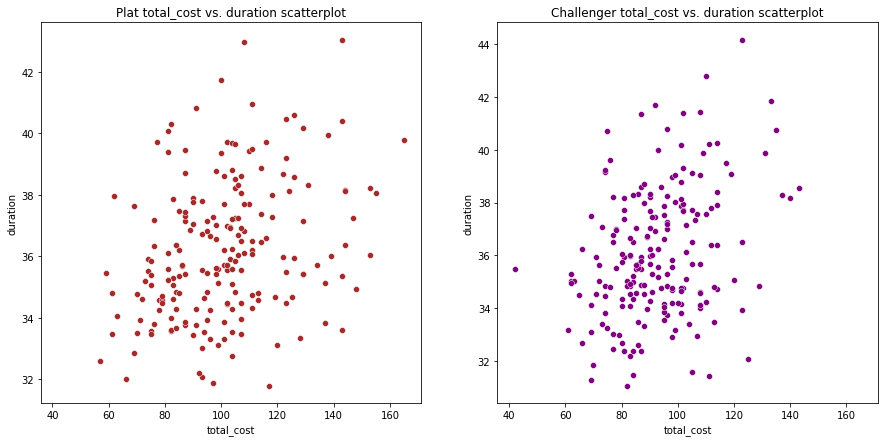

In [36]:
plot_scatterplots()

From our scatterplots we can see that there is a similiar weak linear relationship of total_cost vs. duration in both
elos. Let us dive a bit deeper into these relationships and compare linear regressions for each dataframe:

In [37]:
"""
@description: calculates our regression slope and plots both regressions and puts slopes on legends
@params: None
@returns: None
"""
def plot_regplots():
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(
        plat_sample['duration'],
        plat_sample['total_cost'])
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(
        chal_sample['duration'],
        chal_sample['total_cost'])
    
    
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
    
    axes[0].set_title("Plat total_cost vs. duration linear regression")
    ax1 = sns.regplot(ax=axes[0] ,data=plat_sample,
                x="total_cost", y="duration",
                color="brown", line_kws={'label': "slope : {0:.1f}x".format(slope1)})
    ax1.legend()
    
    axes[1].set_title("Challenger total_cost vs. duration linear regression")
    ax2 = sns.regplot(ax=axes[1] ,data=chal_sample,
            x="total_cost", y="duration",
            color="purple", line_kws={'label': "slope : {0:.1f}x ".format(slope2)})
    ax2.legend()

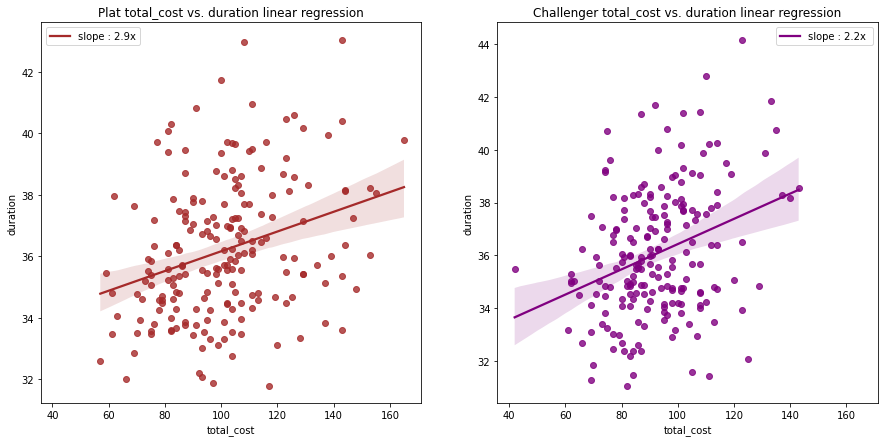

In [38]:
plot_regplots()

From observing both of our linear regressions we see that there is a stronger linear relationship between total_cost and game duration of plat players (slope of around 2.9) than challenger players (slope of around 2.2). This infers as the game duration increases:

- plat players spend 1.32 times more gold every minute than challenger players
- plat players spend 31.2% more gold every minute than challenger players


# Summary

In summary, we conducted EDA on three variables between two different datasets (plat vs. challenger games). namely"
- Total Team Composition Cost
- Game Duration
- Most Used Synergy

With respect to **total team composition cost**, we found that:
- plat players on average spend 96.89 gold, challenger players on average spend 94.42 gold (From mean / percentage calculation)
- plat players on average spend 2.49 more gold than challenger players (From histogram / KDEs)
- plat players spend 2.55% more gold than challenger player's (From histogram / KDEs)
- calculated p_value from t-test (using 0.1 threshold) was 0.00135, marking signficance difference in both means (from calculated t-test)


With respect to **game duration**, we found that:
- plat players on average spend 36.06 minutes in game, challenger players on average spend 35.41 minutes in game (From mean / percentage calculation)
- plat players on average spend 0.65 more minutes (about 39 seconds) in game than challenger players (From histogram / KDEs)
- plat players spend 1.8% more time than challenger players in game (From histogram / KDEs)
- calculated p_value from t-test (using 0.1 threshold) was 1.08e-14, marking signficance difference in both means from calculated t-test)

With respect to **most used synergies**, we found that:
- plat players have 20 unique synergies used while challenger players have 14 (much more variation in plat) (from countplot)
- Top synergy in plat was "blaster" while the top synergy in challenger was "cybernetic" (from countplot)

With respect to analyzing regressions between **game duration and total cost** between elos we found that:
- plat players spend 1.32 times more gold every minute than challenger players
- plat players spend 31.2% more gold every minute than challenger players


Thus, we can conclude through extensive analysis on each of the three variables, that we in turn accept the null hypothesis in our prior assumptions
and current intuition that the rank of a TFT player has an impact on how the game is played.

# Ethics & Privacy

#### **Privacy**

Each row in our dataset includes match data of an anonymous player, data such as in game ranking, team composition, match duration, matchmaking rating, and much more. The dataset does NOT include personal identifiable information; details such as player's username or email have been stripped from the dataset beforehand. Additionally, there are millions of TFT players at each rank, thus trying to identify a player's identity soley through match data is near to impossible. Regarding ownership, the game is owned by the company Riot Games, Inc. and the matches have been made publicly available through their developer API. Riot Games has the rights to the data and players have consented to this when registering for an account, so there is informed consent for data collection and analysis.

#### **Ethics**

The data could be used nefariously by people who tend to make "bots" or AI that automatically plays the game for them. Awareness of what yields a good victory could mean that it could be programmed into a bot's behavior.

#### **Bias**

The "meta" or the currently "Most Effective Tactic Available" is constantly evolving in a dynamic game like Teamfight Tactics. Developers of the game constantly tweak aspects of the match to make different items or champions more fair. The analysis we do currently might not generalize well to the future where drastic changes have been made to the game. In other words, our static data might bias our data towards a previous version of the game.

Also, this data is collected from Korea exclusively. Different regions might have different strategies or play styles which change the data. The most popular strategies we find here are not definitive across all regions by any means.




# Conclusion & Discussion

We created this project with the intention of figuring out whether or not a player's ranking (specifically Platinum vs Challenger) in Team Fight Tactics affected their team composition costs, game duration, and most used synergies while playing. Since being a higher rank implies that a player is more experienced with the game, we believed that factors like total team composition costs and game duration would decrease as their ranking increased. Originally, we discussed whether we should only find if there was a relationship between the costs of a player's team composition and ranking, but in the end we decided to focus on more factors since our original idea was a bit lacking in scope.

**Total Team Composition Costs**

Through a calculation of the mean total costs for Diamond and Challenger players, we found that on average, Diamond players spend 96.86 gold per game while Challenger players spend 94.42 gold per game, a difference of 2.49 gold. In other words, Diamond players spend 2.55% more gold per game than Challenger players on average. This data is illustrated using histograms above. Calculating the T-test for these values revealed that this difference was indeed significant. 

We can then conclude that as team ranking increases, total team composition costs does indeed decrease as well.

**Game Duration**

Calculations for the mean game duration showed that Platinum players on average spend 36.06 minutes in game while Challenger players on average spend 35.41 minutes in game, a difference of 39 seconds. From our histograms and KDES, we found that Platinum players spend 1.8% more time in-game than Challenger players, and a T-test revealed that this difference was indeed significant.

Thus we conclude that game duration does decrease as ranking increases.

**Most Used Synergies**

Our count plot shows that Platinum players have 20 unique synergies while Challenger players have 14. We have also found that Platinum players tend to play the "blaster" synergy, while Challenger players tend to play the "cybernetic" synergy.

Thus, we can conclude that not only are synergies used differently in Platinum vs. Challenger games, but the variation of synergies is also different. Platinum players tend to experiment with different play styles in their games, while Challenger players tend to stick to a few play styles.

**Relationship Between Game Duration and Total Cost**

We createdscatterplots we can see that there is a similiar weak linear relationship of total costs vs. game duration. Using scatterplots and linear regressions, we found that Platinum players spend 1.32 times more gold every minute than Challenger players, or in other words 31.2% more gold.

In the end, our analysis reveals that there are apparent differences in gamplay between Platinum ranked players and Challenger ranked players. Thus, we conclude that our hypothesis holds true.



# Team Contributions

- Jaden : Main Coder & Project Manager / assigning & delegating work
- Jennifer: Coding / Code Reviewer / Data Cleaning / conclusion & discussion
- Tony: Coding / Code Reviewer / Video / Slides / Project Context
- Catherine: Coding / Privacy ethics research / Data cleaning / Overview section
- Daphne: Domain Knowledge / Background & Context / Video / Slides